### Question 1

Dataset: Kaggle link (Weather Data)
Consider the above-mentioned dataset for a regression problem (where output labels are numeric) and apply following feature selection techniques:
        Correlation Analysis
        Mutual Information
        Variance Threshold (Not discussed in the lecture, need to do a research by your side)
Plot the feature importance graph as well and comment which technique provided more usefule set of features and why ?


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

In [35]:
PATH = 'weatherHistory.csv'

In [116]:
def load_csv(path: str) -> 'dataframe':
    '''
    Description: loads dataframe and provide some
    basic information about the dataframe
    input
        path: path to dataframe
    output
        a dataframe
    '''
    df = pd.read_csv(path)
    print('columns:\n', df.columns,'\n')
    print('columns data types:\n', df.dtypes,'\n')
    return df


def float_data(df: 'dataframe'):
    
    df_float.fillna(df_float.mean())
    df_float = df.select_dtypes('float')
    return df_float


def corr_analysis(df: 'dataframe'):
    '''
    Description: generates a correlation heatmap and suggests
    columns that can be dropped based on correlation
    input
        df: dataframe, should only have numeric data
    '''
    corr = df.corr(method='pearson')
    for col in corr.columns:
        for ind in corr.index:
            if (col != ind) and (corr[col][ind] > 0.5):
                print(f'{col} and {ind} are correlated. you can drop one!')
    f,ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(corr,cmap="YlGnBu", annot=True)
    return corr


def mutual_info(df: 'dataframe'):
    '''
    Description: applies mutual information technique for 
    feature selection
    input
        df: dataframe, should only have numeric data
    '''
    

In [106]:
# loading dataframe and having some
# basic analysis
path = PATH
df = load_csv(PATH)
df.head(5)

columns:
 Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object') 

columns data types:
 Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object 



,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [107]:
# Description of the data
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


#### Correlation
The function is described above. Any two columns that have correlation above 

Temperature (C) and Apparent Temperature (C) are correlated. you can drop one!
Apparent Temperature (C) and Temperature (C) are correlated. you can drop one!


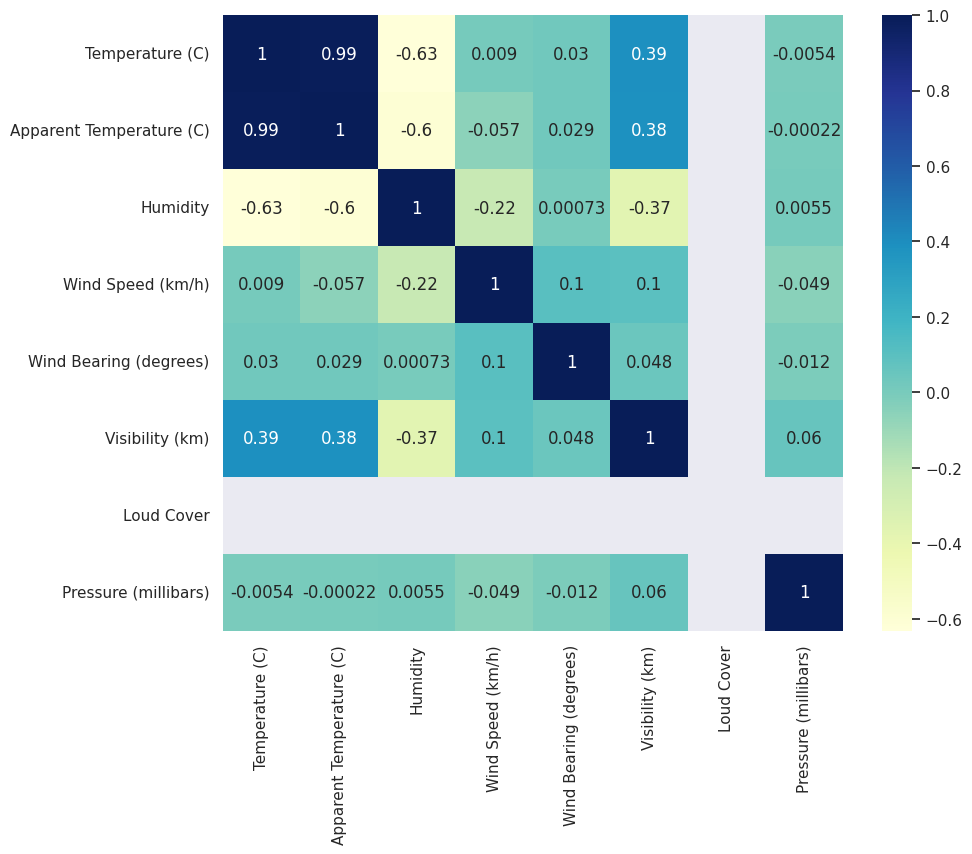

In [108]:
corr = corr_analysis(df)

The correlation analysis shows that Temp and Apparent Temp are highly correlated. the function suggests that we can drop one. I choose to drop Apparent Temp

In [114]:
df.drop(columns=['Apparent Temperature (C)'], inplace=True)